## Summarize decision data and prepare for R analysis

This is primarily here to generate a tidy version of the data in order to anlayze in R using lmer.


In [1]:
import os
import pandas
import seaborn
import numpy
import matplotlib.pyplot as plt
from utils import get_metadata,get_decisions,get_merged_metadata_decisions

basedir = '/Users/poldrack/data_unsynced/NARPS'
figdir = os.path.join(basedir,'maps/figures')

%matplotlib inline

/Users/poldrack/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/Users/poldrack/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
# load metadata
metadata = get_metadata()

decision_df = get_decisions(tidy=True)
decision_df.head()

,teamID,Decision,varnum,Similar,Confidence
0,50GV,1,1,9,10
1,9Q6R,1,1,10,10
2,O21U,0,1,3,8
3,U26C,0,1,6,8
4,43FJ,0,1,5,3


#### Table of mean results from each hypothesis

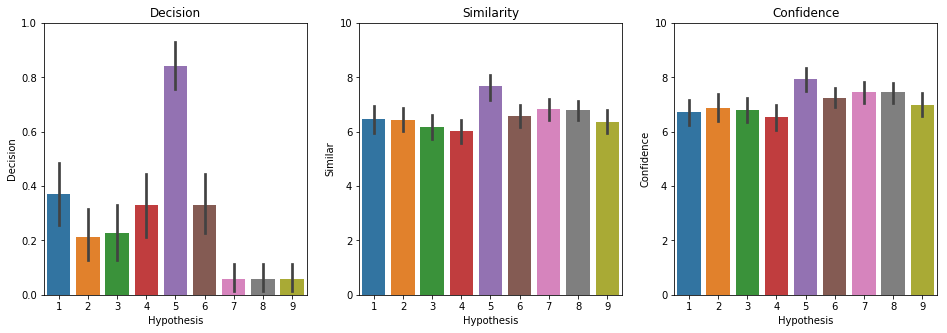

In [3]:
fig, ax = plt.subplots(1,3,figsize=(16,5))

seaborn.barplot('varnum','Decision',data=decision_df,ax=ax[0])
ax[0].set_ylim([0,1])
ax[0].set_xlabel('Hypothesis')
ax[0].set_title('Decision')

seaborn.barplot('varnum','Similar',data=decision_df,ax=ax[1])
ax[1].set_ylim([0,10])
ax[1].set_xlabel('Hypothesis')
ax[1].set_title('Similarity')

seaborn.barplot('varnum','Confidence',data=decision_df,ax=ax[2])
ax[2].set_ylim([0,10])
ax[2].set_xlabel('Hypothesis')
ax[2].set_title('Confidence')

plt.savefig(os.path.join(figdir,'decision_summary.pdf'))

### integrate smoothness data

In [4]:
alldata_df = get_merged_metadata_decisions()
alldata_df['varnum']=alldata_df['varnum'].astype('int')
# recode variables to make analysis cleaner

def package_recoder(p):
    others = ['nistats','PALM','randomise']
    if not isinstance(p,str):
        return('Other')
    if p.find('SPM')==0:
        return('SPM')
    elif p in others:
        return('Other')
    else:
        return p

alldata_df['software'] = [package_recoder(x) for x in alldata_df['TSc_SW']]

smoothness_df = pandas.read_csv(os.path.join(basedir,'maps/smoothness_est.csv'))

alldata_df = pandas.merge(alldata_df,smoothness_df,left_on=['teamID','varnum'],right_on=['teamID','hyp'])
assert numpy.sum(alldata_df.hyp != alldata_df.varnum)==0

# average FWHM estimated as:
# AvgFWHM = RESELS^(1/3) (multplied by 2 since this value is in voxels rather than mm)
# per: https://www.jiscmail.ac.uk/cgi-bin/webadmin?A2=FSL;e792b5da.0803

alldata_df['fwhm'] = [i**(1/3.)*2 for i in alldata_df.resels]

# save data for loading into R
alldata_df.to_csv('/Users/poldrack/data_unsynced/NARPS/decision_data.csv')

/Users/poldrack/Dropbox/code/narps/analysis/utils.py:77: FutureWarning: 'teamID' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  alldata_df = decision_df.merge(metadata,on='teamID',how='left')


### Plot decisions splitting by use of fmriprep

Text(0.5, 0, 'Hypothesis')

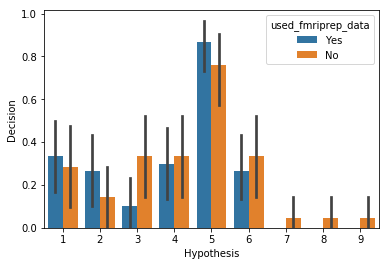

In [5]:
seaborn.barplot('varnum','Decision',data=alldata_df,hue='used_fmriprep_data')
plt.xlabel('Hypothesis')

### Plot smoothing as function of decision



Text(0, 0.5, 'applied smoothing kernel (FWHM mm)')

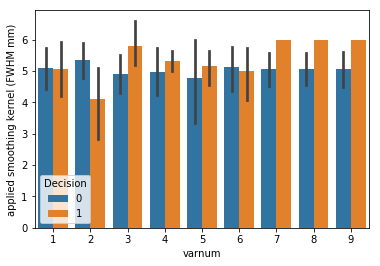

In [6]:
# applied smoothing kernel

seaborn.barplot('varnum','TSc_smoothing',data=alldata_df,hue='Decision')
plt.ylabel('applied smoothing kernel (FWHM mm)')

Text(0, 0.5, 'estimated smooothness (FWHM mm)')

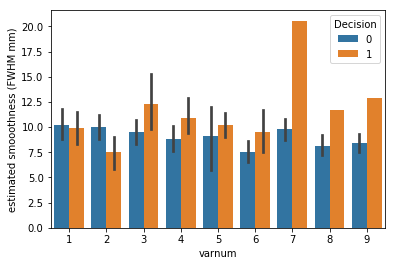

In [7]:

seaborn.barplot('varnum','fwhm',data=alldata_df,hue='Decision')
plt.ylabel('estimated smooothness (FWHM mm)')

SpearmanrResult(correlation=0.8182722568624459, pvalue=6.254539205415011e-86)


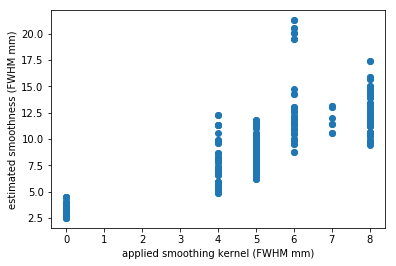

In [8]:
# confirm that applied smoothing relates to estimated smoothness
import scipy.stats

plt.scatter(alldata_df.TSc_smoothing,alldata_df.fwhm)
plt.xlabel('applied smoothing kernel (FWHM mm)')
_=plt.ylabel('estimated smoothness (FWHM mm)')
print(scipy.stats.spearmanr(alldata_df.TSc_smoothing,alldata_df.fwhm,nan_policy='omit'))

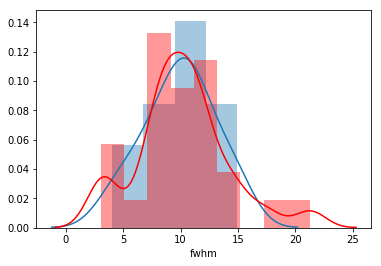

In [9]:
# distribution of FWHM as a function of decision for hypothesis 1

seaborn.distplot(alldata_df.query('Decision==1 & varnum==1').fwhm.dropna())
seaborn.distplot(alldata_df.query('Decision==0 & varnum==1').fwhm.dropna(),color='r')


In [14]:
alldata_df[['teamID','TSc_smoothing']].query('TSc_smoothing == 8')

,teamID,TSc_smoothing
5,C88N,8.0
7,2T6S,8.0
17,9T8E,8.0
18,94GU,8.0
30,J7F9,8.0
34,Q6O0,8.0
38,46CD,8.0
48,3TR7,8.0
57,C88N,8.0
59,2T6S,8.0
